<a href="https://colab.research.google.com/github/Deekshit1325/email-spam-detector/blob/main/EMAIL_SPAM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score,
    accuracy_score
)

In [97]:
#Parent Class for Data
class data_read_write(object):
    def __init__(self):
        pass
    def __init__(self, file_link):
        self.data_frame =  pd.read_csv(file_link)
    def read_csv_file(self, file_link):
        #data_frame_read = pd.read_csv(file_link)
        #return data_frame_read
        #self.data_frame = pd.read_csv(file_link)
        return self.data_frame
    def write_to_csvfile(self, file_link):
        self.data_frame.to_csv(file_link, encoding='utf-8', index=False, header=True)
        return

In [98]:
#Child Class for Data_read_write
class generate_word_cloud(data_read_write):
    def __init__(self):
        pass
    #Child own Function
    def variance_column(self, data):
        return variance(data)
    #Polymorphism
    def word_cloud(self, data_frame_column, output_image_file):
        text = " ".join(review for review in data_frame_column)
        stopwords = set(STOPWORDS)
        stopwords.update(["subject"])
        wordcloud = WordCloud(width = 1200, height = 800, stopwords=stopwords, max_font_size = 50, margin=0, background_color = "white").generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        wordcloud.to_file(output_image_file)
        return

In [99]:
#Child Class for Data_read_write
class data_cleaning(data_read_write):
    def __init__(self):
        pass
    def message_cleaning(self, message):
            Test_punc_removed = [char for char in message if char not in string.punctuation]
            Test_punc_removed_join = ''.join(Test_punc_removed)
            Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
            final_join = ' '.join(Test_punc_removed_join_clean)
            return final_join


    def apply_to_column(self, data_column_text):
        data_processed = data_column_text.apply(self.message_cleaning)
        return data_processed



In [109]:
class apply_embedding_and_model(data_read_write):
    def __init__(self):
        pass

    def apply_count_vector(self, v_data_column):
        return CountVectorizer(min_df=2).fit_transform(v_data_column)

    def _evaluate_model(self, model, X_test, y_test, label):
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred))
        print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
        print("F1 Score:", metrics.f1_score(y_test, y_pred))
        print("Recall:", metrics.recall_score(y_test, y_pred))
        print("Precision:", metrics.precision_score(y_test, y_pred))

        for title, normalize in [("Confusion matrix", None), ("Normalized", 'true')]:
            disp = plot_confusion_matrix(model, X_test, y_test, display_labels=['ham', 'spam'],
                                         cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
            print(title, disp.confusion_matrix)
        plt.show()

        ns_probs = [0] * len(y_test)
        probs = model.predict_proba(X_test)[:, 1]
        print(f'No Skill: ROC AUC={roc_auc_score(y_test, ns_probs):.3f}')
        print(f'{label}: ROC AUC={roc_auc_score(y_test, probs):.3f}')

        ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
        model_fpr, model_tpr, _ = roc_curve(y_test, probs)
        pyplot.plot(ns_fpr, ns_tpr, '--', label='No Skill')
        pyplot.plot(model_fpr, model_tpr, marker='.', label=label)
        pyplot.xlabel('False Positive Rate')
        pyplot.ylabel('True Positive Rate')
        pyplot.legend()
        pyplot.show()

    def apply_naive_bayes(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = MultinomialNB().fit(X_train, y_train)
        self._evaluate_model(model, X_test, y_test, label='Naive Bayes')

    def apply_svm(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = svm.SVC(C=2, kernel='linear', gamma=1, probability=True).fit(X_train, y_train)
        self._evaluate_model(model, X_test, y_test, label='SVM')


In [101]:
data_obj = data_read_write("emails.csv")

In [102]:
data_frame = data_obj.read_csv_file("processed.csv")
data_frame.head()
data_frame.tail()
data_frame.describe()
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [103]:
data_frame.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [104]:
#Visualize dataset
# Let's see which message is the most popular ham/spam message
data_frame.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: telephone interview with the enron re...    2
1     1368   1368  Subject: hot stock info : drgv announces anoth...    1

In [105]:
# Let's get the length of the messages
data_frame['length'] = data_frame['text'].apply(len)
data_frame['length'].max()

43952

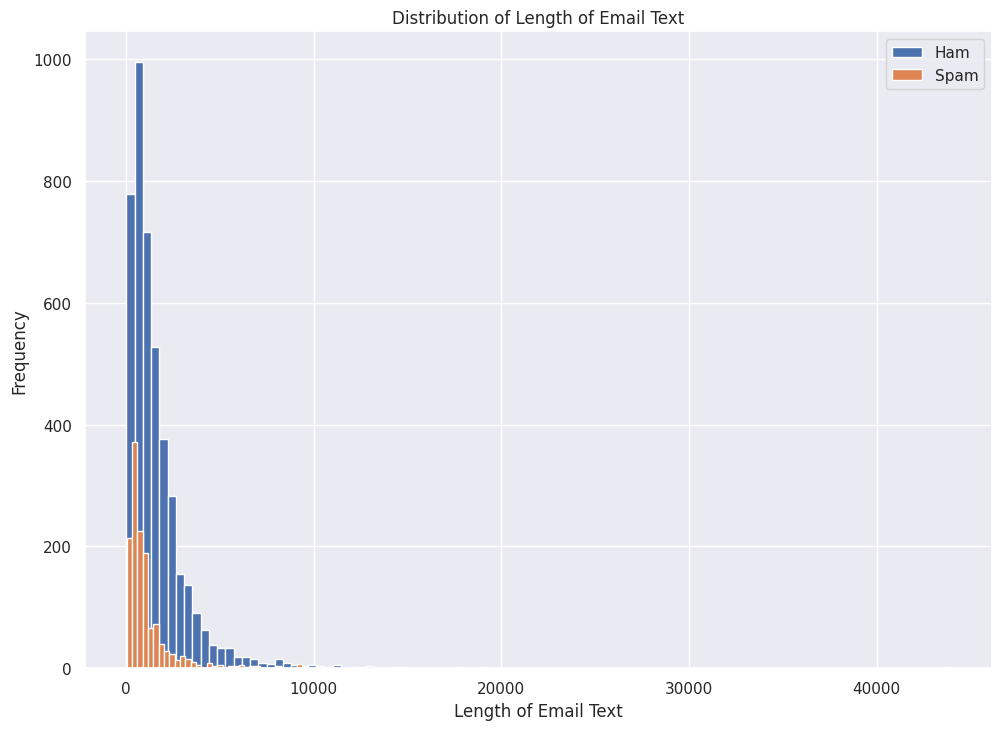

In [106]:
#data_frame['length'].plot(bins=100, kind='hist')
#Length of characters for ham emails is more as compared to spam emails
sns.set(rc={'figure.figsize':(11.7,8.27)})
ham_messages_length =  data_frame[data_frame['spam']==0]
spam_messages_length =  data_frame[data_frame['spam']==1]

ham_messages_length['length'].plot(bins=100, kind='hist',label = 'Ham')
spam_messages_length['length'].plot(bins=100, kind='hist',label = 'Spam')
#sns.distplot(ham_messages_length['length'], bins=10, norm_hist = True, label = 'Ham')
#sns.distplot(spam_messages_length['length'], bins=10, norm_hist = True, label = 'Spam')
plt.title('Distribution of Length of Email Text')
plt.xlabel('Length of Email Text')
plt.legend()


#ax = sns.distplot(ham_words_length, norm_hist = True, bins = 30, label = 'Ham')
#ax = sns.distplot(spam_words_length, norm_hist = True, bins = 30, label = 'Spam')

#plt.legend()
#plt.title('Distribution of Number of Words')
#plt.xlabel('Number of Words')
#plt.show()

In [107]:
import shutil
shutil.rmtree('/root/nltk_data/tokenizers/punkt', ignore_errors=True)
import nltk
nltk.download('punkt')
ham_words_length = [len(title.split()) for title in data_frame[data_frame['spam'] == 0].text.values]
spam_words_length = [len(title.split()) for title in data_frame[data_frame['spam'] == 1].text.values]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


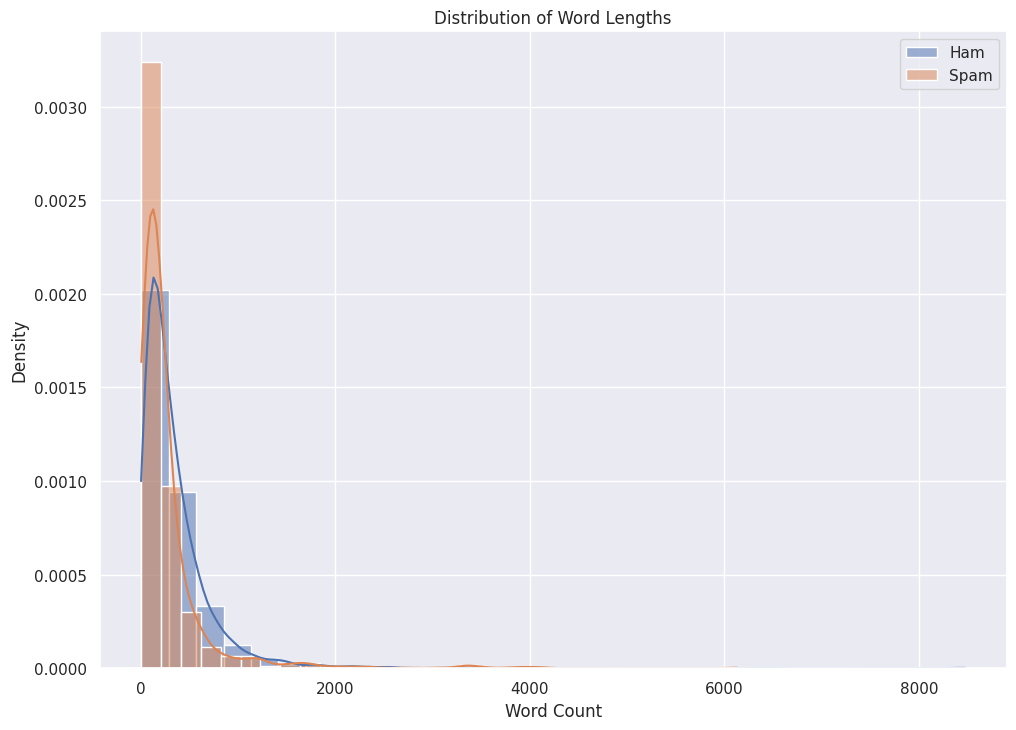

In [114]:
ax = sns.histplot(ham_words_length, stat='density', bins=30, label='Ham', kde=True)
ax = sns.histplot(spam_words_length, stat='density', bins=30, label='Spam', kde=True)

plt.title('Distribution of Word Lengths')
plt.xlabel('Word Count')
plt.legend()
plt.show()


In [60]:
import nltk
nltk.data.path.append('/root/nltk_data')
nltk.download('punkt', download_dir='/root/nltk_data')

def mean_word_length(x):
    # Split the text into words based on whitespace and calculate the length of each word
    word_lengths = [len(word) for word in x.split()]
    return np.mean(word_lengths)
# Apply the mean_word_length function to both ham and spam messages
ham_meanword_length = data_frame[data_frame['spam'] == 0].text.apply(mean_word_length)
spam_meanword_length = data_frame[data_frame['spam'] == 1].text.apply(mean_word_length)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


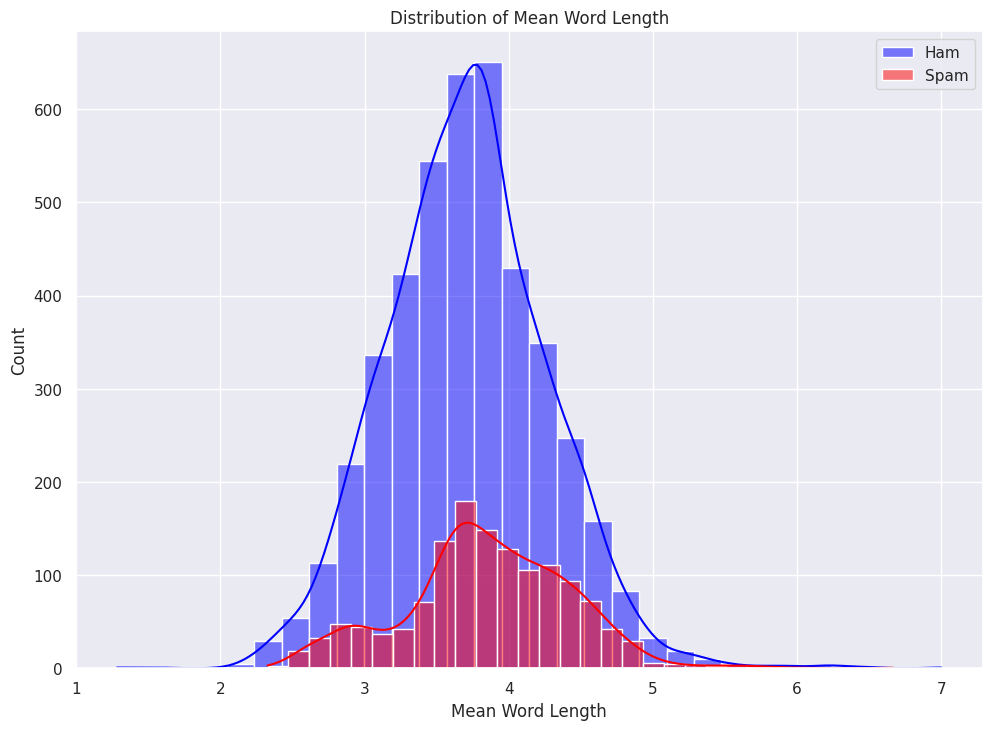

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distributions of mean word lengths
sns.histplot(ham_meanword_length, kde=True, bins=30, label='Ham', color='blue')
sns.histplot(spam_meanword_length, kde=True, bins=30, label='Spam', color='red')

plt.title('Distribution of Mean Word Length')
plt.xlabel('Mean Word Length')
plt.legend()
plt.show()


Ham Mean: 0.279
Spam Mean: 0.283


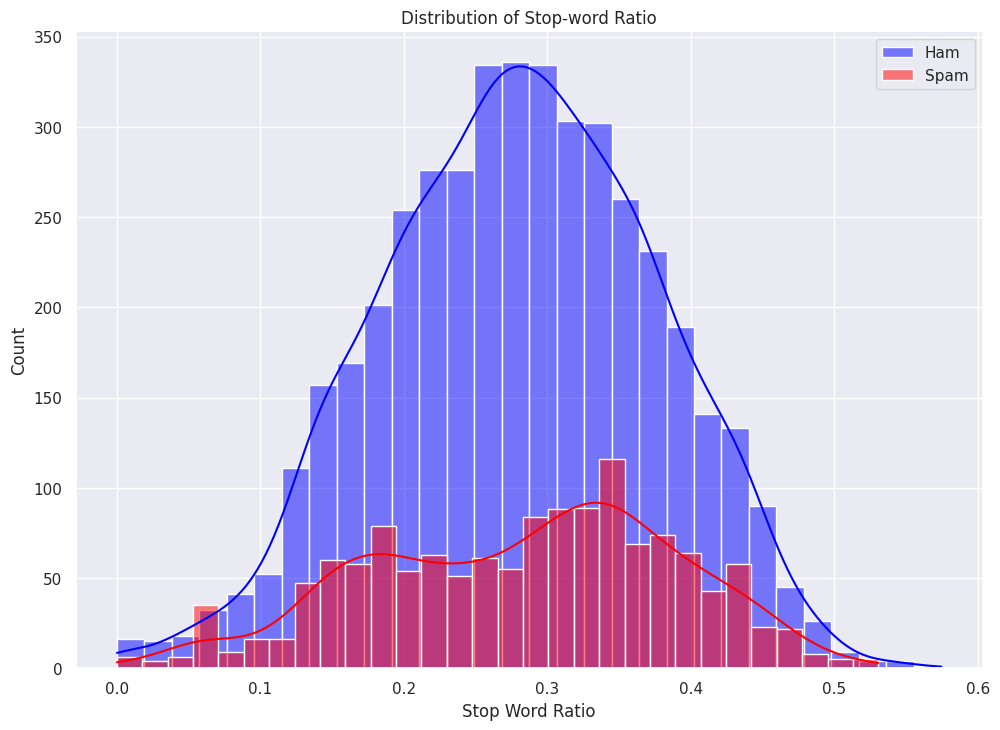

In [110]:
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

# Download stopwords only if not already available
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

# Use NLTK's built-in stopwords
stop_words = set(stopwords.words('english'))

# Function to calculate stop-word ratio
def stop_words_ratio(text):
    words = text.split()
    if not words:
        return 0
    return sum(1 for word in words if word.lower() in stop_words) / len(words)

# Apply to ham and spam texts
ham = data_frame[data_frame['spam'] == 0]['text'].apply(stop_words_ratio)
spam = data_frame[data_frame['spam'] == 1]['text'].apply(stop_words_ratio)

# Print mean values
print(f'Ham Mean: {ham.mean():.3f}')
print(f'Spam Mean: {spam.mean():.3f}')

# Plotting
sns.histplot(ham, kde=True, bins=30, label='Ham', color='blue')
sns.histplot(spam, kde=True, bins=30, label='Spam', color='red')
plt.title('Distribution of Stop-word Ratio')
plt.xlabel('Stop Word Ratio')
plt.legend()
plt.show()



Spam percentage = 23.88268156424581 %
Ham percentage = 76.11731843575419 %


<Axes: ylabel='Frequency'>

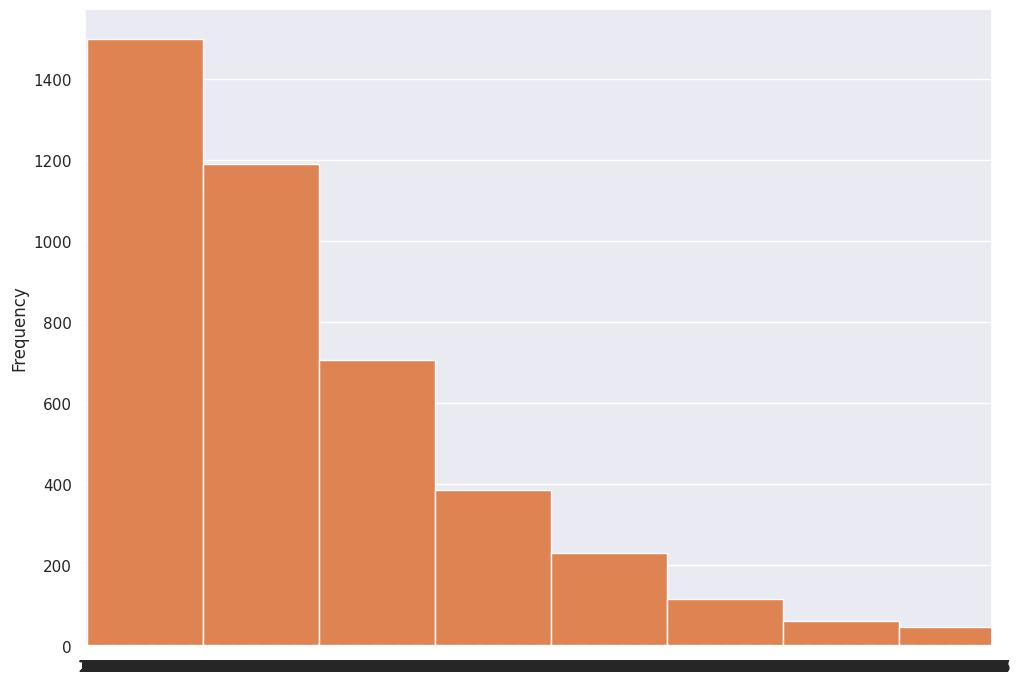

In [54]:
# Let's divide the messages into spam and ham
ham = data_frame[data_frame['spam']==0]
spam = data_frame[data_frame['spam']==1]
spam['length'].plot(bins=60, kind='hist')
ham['length'].plot(bins=60, kind='hist')
data_frame['Ham(0) and Spam(1)'] = data_frame['spam']
print( 'Spam percentage =', (len(spam) / len(data_frame) )*100,"%")
print( 'Ham percentage =', (len(ham) / len(data_frame) )*100,"%")
sns.countplot(data_frame['Ham(0) and Spam(1)'], label = "Count")

#word_cloud_obj = generate_word_cloud()
#word_cloud_obj.word_cloud(ham["clean_text"], "ham_word_cloud.png")
#word_cloud_obj.word_cloud(spam["clean_text"], "spam_word_cloud.png")
#text_spam = " ".join(review for review in spam["clean_text"])

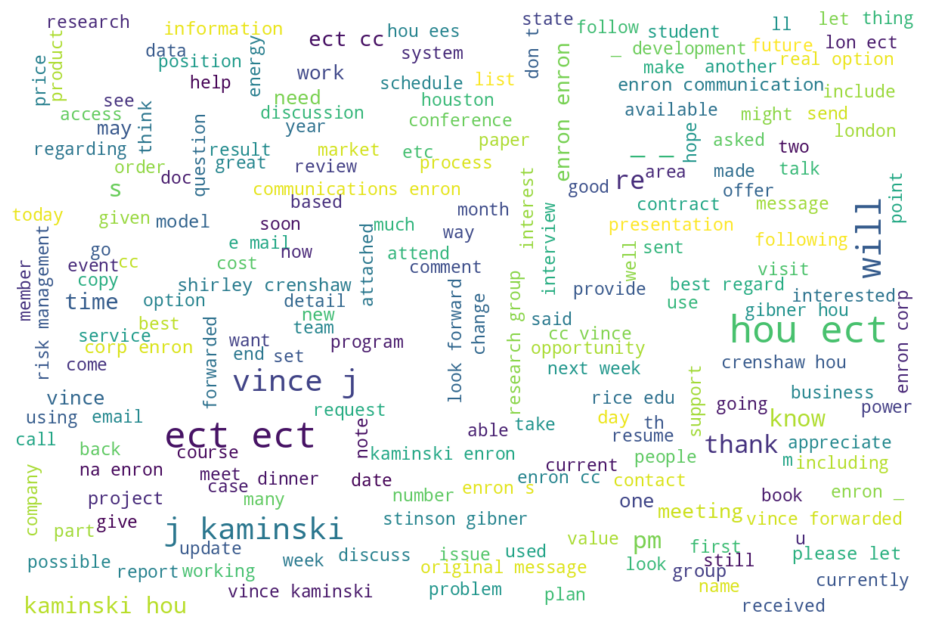

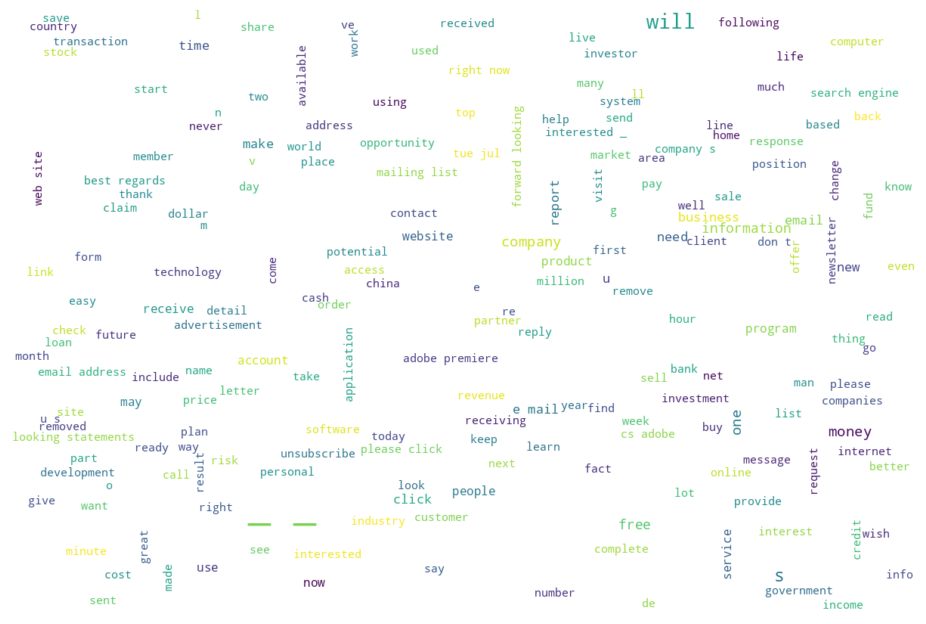

In [55]:
word_cloud_obj = generate_word_cloud()
word_cloud_obj.word_cloud(ham["text"], "ham_word_cloud.png")
word_cloud_obj.word_cloud(spam["text"], "spam_word_cloud.png")

In [74]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english')[:10])  # Print the first 10 stop words
data_clean_obj = data_cleaning()
# Let's test the newly added function
#data_frame['clean_text'] = data_frame['text'].apply(message_cleaning)
#data_frame['clean_text'] = data_frame['text'].apply(data_clean_obj.message_cleaning)
data_frame['clean_text'] = data_clean_obj.apply_to_column(data_frame['text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


In [73]:
data_frame.head()

,text,spam,length,Ham(0) and Spam(1)
0,Subject: naturally irresistible your corporate...,1,1484,1
1,Subject: the stock trading gunslinger fanny i...,1,598,1
2,Subject: unbelievable new homes made easy im ...,1,448,1
3,Subject: 4 color printing special request add...,1,500,1
4,"Subject: do not have money , get software cds ...",1,235,1


In [75]:
data_obj.data_frame.head()

,text,spam,length,Ham(0) and Spam(1),clean_text
0,Subject: naturally irresistible your corporate...,1,1484,1,Subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,598,1,Subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,448,1,Subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,500,1,Subject 4 color printing special request addit...
4,"Subject: do not have money , get software cds ...",1,235,1,Subject money get software cds software compat...


In [77]:
data_obj.write_to_csvfile("processed_file.csv")

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

class apply_embeddding_and_model:
    def __init__(self):
        pass

    def apply_count_vector(self, text_column):
        from sklearn.feature_extraction.text import CountVectorizer
        vectorizer = CountVectorizer()
        return vectorizer.fit_transform(text_column)

    def apply_naive_bayes(self, X, y):
        # Split the dataset into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Initialize the Naive Bayes classifier
        NB_classifier = MultinomialNB()

        # Fit the model
        NB_classifier.fit(X_train, y_train)

        # Predict on the test set
        y_pred = NB_classifier.predict(X_test)

        # Calculate accuracy and other metrics
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy Score: {accuracy}')
        print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

        # Display the confusion matrix using ConfusionMatrixDisplay
        class_names = ['Ham', 'Spam']  # Assuming 0 = Ham, 1 = Spam
        disp = ConfusionMatrixDisplay.from_estimator(
            NB_classifier,
            X_test,
            y_test,
            display_labels=class_names,
            cmap=plt.cm.Blues
        )
        disp.plot()
        plt.show()

        return accuracy, y_pred


Accuracy Score: 0.9889470622454916
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1278
           1       0.97      0.99      0.98       441

    accuracy                           0.99      1719
   macro avg       0.98      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719



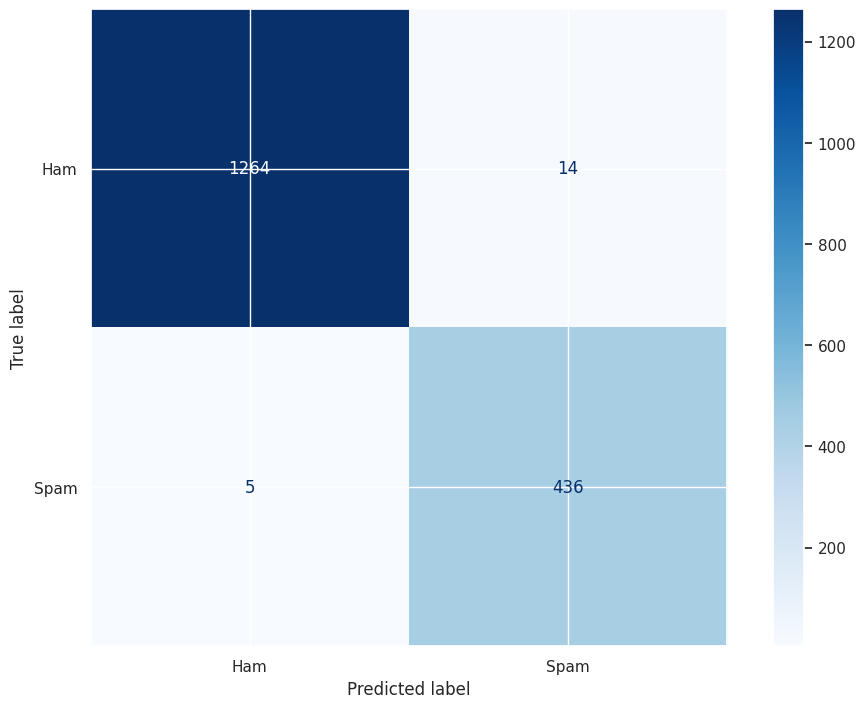

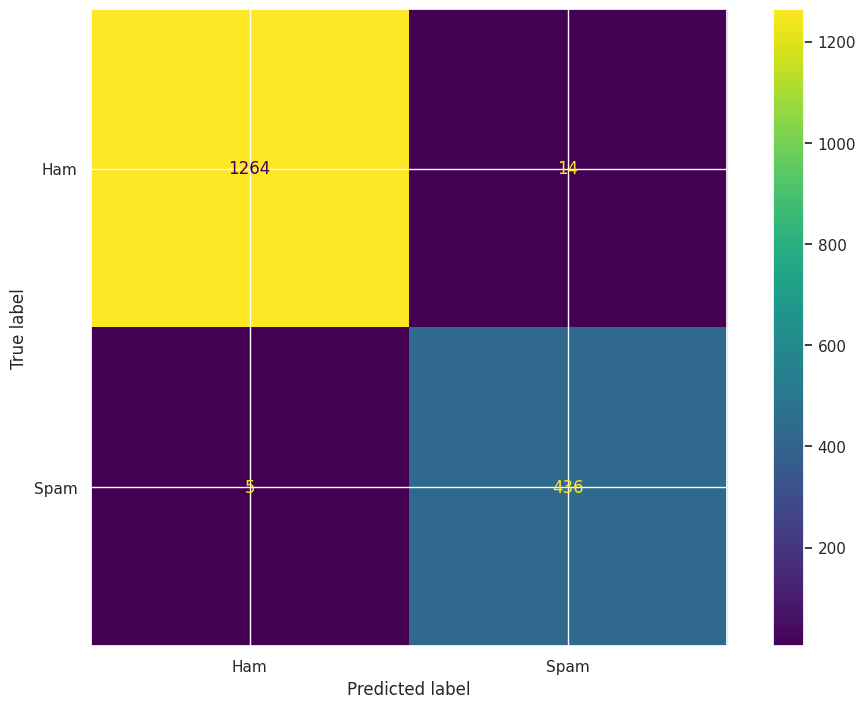

(0.9889470622454916, array([0, 0, 0, ..., 1, 1, 0]))

In [88]:
# Assuming data_clean_obj is defined and the cleaned text is in 'clean_text'
cv_object = apply_embeddding_and_model()

# Apply the count vectorizer to the cleaned text
spamham_countvectorizer = cv_object.apply_count_vector(data_frame['clean_text'])

# Get the labels (spam/ham)
label = data_frame['spam'].values
y = label

# Apply Naive Bayes and plot the confusion matrix
cv_object.apply_naive_bayes(spamham_countvectorizer, y)


SVM Accuracy: 0.9825
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1278
           1       0.98      0.95      0.97       441

    accuracy                           0.98      1719
   macro avg       0.98      0.97      0.98      1719
weighted avg       0.98      0.98      0.98      1719



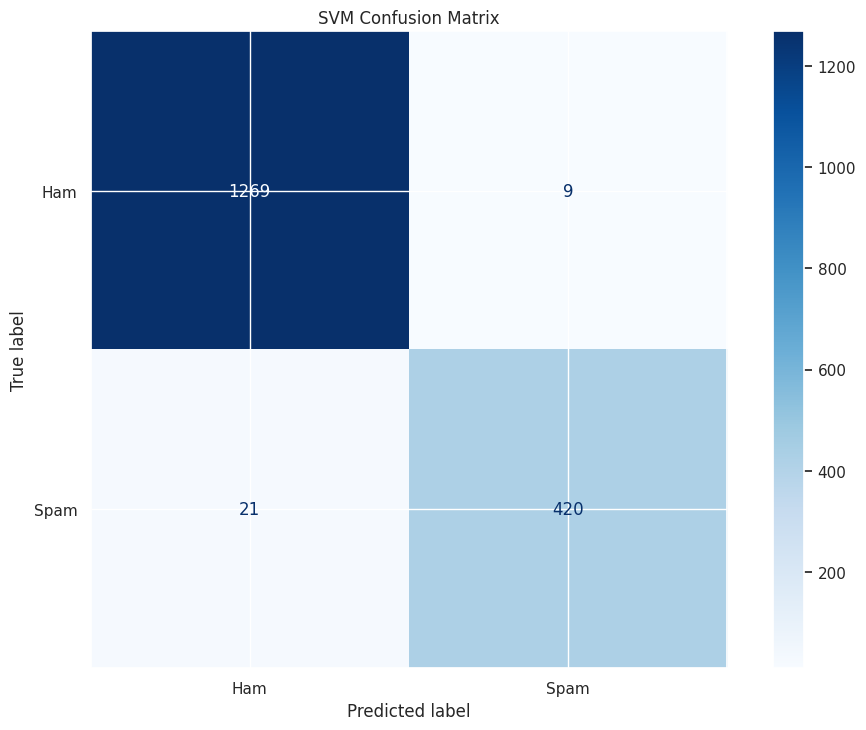

(0.9825479930191972, array([0, 0, 0, ..., 1, 1, 0]))

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

class apply_embedding_and_model:
    def __init__(self):
        self.vectorizer = CountVectorizer()

    def apply_count_vector(self, text_column):
        return self.vectorizer.fit_transform(text_column)

    def _train_and_evaluate(self, model, X, y, model_name='Model'):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        print(f'{model_name} Accuracy: {acc:.4f}')
        print(f'{model_name} Classification Report:\n{classification_report(y_test, y_pred)}')

        ConfusionMatrixDisplay.from_estimator(
            model, X_test, y_test, display_labels=['Ham', 'Spam'], cmap=plt.cm.Blues
        )
        plt.title(f'{model_name} Confusion Matrix')
        plt.show()

        return acc, y_pred

    def apply_naive_bayes(self, X, y):
        return self._train_and_evaluate(MultinomialNB(), X, y, model_name='Naive Bayes')

    def apply_svm(self, X, y):
        return self._train_and_evaluate(SVC(kernel='linear'), X, y, model_name='SVM')


# Example usage — assuming your DataFrame has 'text' and 'spam' columns
cv_model = apply_embedding_and_model()

# Use the correct column name here ('text' instead of 'clean_text')
X = cv_model.apply_count_vector(data_frame['text'])

# Get labels (spam: 0 or 1)
y = data_frame['spam'].values

# Apply the SVM model
cv_model.apply_svm(X, y)


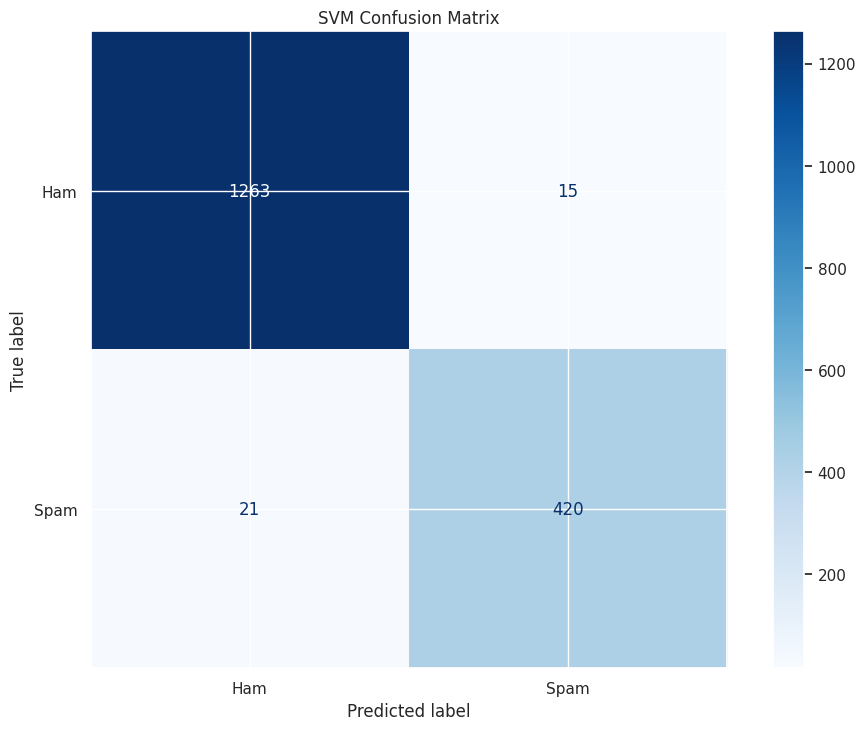

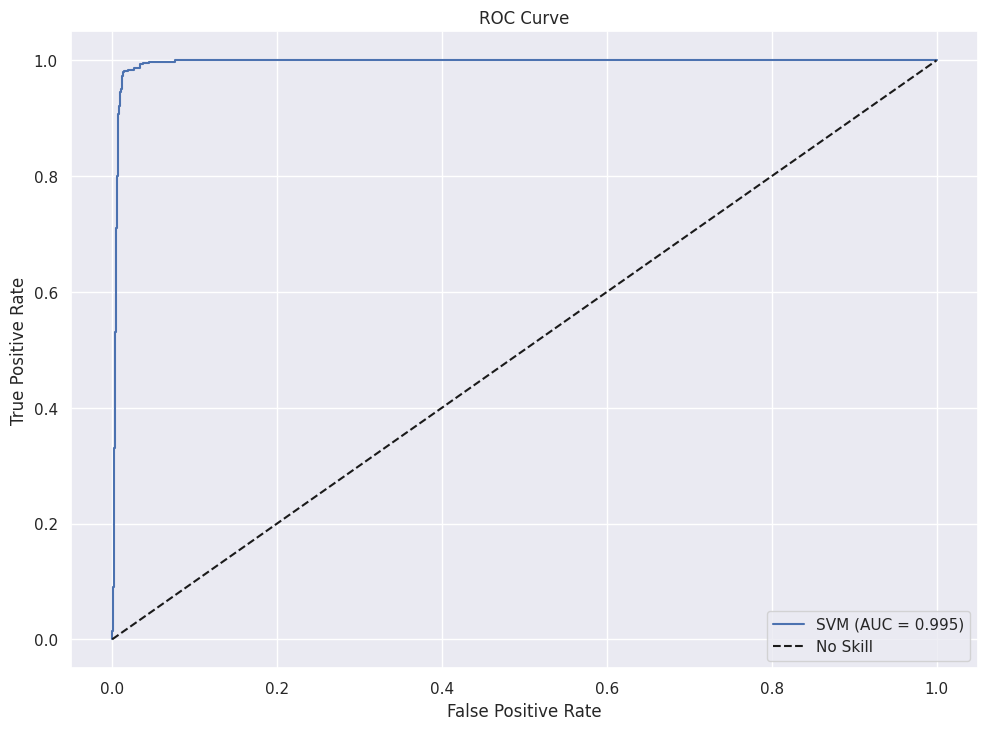

In [108]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    svm_model, X_test, y_test,
    display_labels=['Ham', 'Spam'],
    cmap=plt.cm.Blues
)
plt.title("SVM Confusion Matrix")
plt.show()

# ROC Curve
y_scores = svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
